In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [123]:
pd.set_option('display.max_columns', None)

In [124]:
input_df = pd.read_csv("brvehins2020_1H_20p.csv", sep=",")
input_df.head()

,Year,YearHalf,Area,StateName,StateAb,DrivAge,Gender,VehCat,VehGroup,VehModel,VehYear,ExposTotal,PremTotal,ExposFireRob,PremFireRob,SumInsAvg,ClaimNbRob,ClaimAmountRob,ClaimNbPartColl,ClaimAmountPartColl,ClaimNbTotColl,ClaimAmountTotColl,ClaimNbFire,ClaimAmountFire,ClaimNbOther,ClaimAmountOther,ENVIO
0,2020,1st,Sul,Minas Gerais,MG,26-35,Male,National Tour,VW VOLKSWAGEN VOYAGE,VOYAGE SELECAO 1.6 Total Flex 8V 4p,2014,0.408219,581.790161,0,0,37489.000824,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2020B
1,2020,1st,Brasilia,Distrito Federal,DF,55+,Female,National Tour,FIAT BRAVO,FIAT NOVO BRAVO ESSENCE 1.8 16V FLEX,2014,1.936986,2181.732979,0,0,26653.846655,0,0.0,0,0.0,0,0.0,0,0.0,3,250.0,2020B
2,2020,1st,Demais regioes,Parana,PR,46-55,Female,National Tour,VW VOLKSWAGEN FOX ACIMA DE 1.0,Fox Connect 1.6 Flex 8V 5p,2018,8.975342,10653.544531,0,0,43953.900218,0,0.0,0,0.0,0,0.0,0,0.0,1,1097.0,2020B
3,2020,1st,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,No information,Male,National Tour,VW VOLKSWAGEN - VIRTUS,VIRTUS 1.6 MSI Flex 16V 4p Aut.,2020,0.498630,746.844666,0,0,63944.001640,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2020B
4,2020,1st,Sergipe,Sergipe,SE,46-55,Female,Pick-up (domestic and imported),MITSUBISHI PAJERO,Pajero TR4 2.0 Flex 16V 4X2 Mec.,2013,0.460274,649.841980,0,0,40899.429758,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2020B


In [125]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588373 entries, 0 to 588372
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 588373 non-null  int64  
 1   YearHalf             588373 non-null  object 
 2   Area                 581329 non-null  object 
 3   StateName            581329 non-null  object 
 4   StateAb              581329 non-null  object 
 5   DrivAge              588373 non-null  object 
 6   Gender               588373 non-null  object 
 7   VehCat               588373 non-null  object 
 8   VehGroup             576051 non-null  object 
 9   VehModel             576051 non-null  object 
 10  VehYear              588373 non-null  int64  
 11  ExposTotal           588373 non-null  float64
 12  PremTotal            588373 non-null  float64
 13  ExposFireRob         588373 non-null  int64  
 14  PremFireRob          588373 non-null  int64  
 15  SumInsAvg        

In [126]:
input_df.describe()

,Year,VehYear,ExposTotal,PremTotal,ExposFireRob,PremFireRob,SumInsAvg,ClaimNbRob,ClaimAmountRob,ClaimNbPartColl,ClaimAmountPartColl,ClaimNbTotColl,ClaimAmountTotColl,ClaimNbFire,ClaimAmountFire,ClaimNbOther,ClaimAmountOther
count,588373.0,588373.000000,588373.000000,5.883730e+05,588373.0,588373.0,5.883730e+05,588373.000000,5.883730e+05,588373.000000,588373.000000,588373.000000,588373.000000,588373.000000,588373.000000,588373.000000,588373.000000
mean,2020.0,2013.071869,2.442338,3.553819e+03,0.0,0.0,5.366754e+04,0.013471,5.349539e+02,0.109905,742.017092,0.014443,646.117318,0.000535,19.156885,0.516873,423.269009
std,0.0,8.236013,12.584624,1.450416e+04,0.0,0.0,5.714139e+04,0.154052,7.722261e+03,1.173136,5245.013567,0.128843,7550.256199,0.025441,1307.448508,2.377451,4223.794813
min,2020.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,2011.000000,0.473973,4.226448e+02,0.0,0.0,2.248500e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,2014.000000,0.531507,1.028171e+03,0.0,0.0,3.914995e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.0,2017.000000,1.695890,2.757672e+03,0.0,0.0,6.656093e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.0,2021.000000,5667.040963,5.062492e+06,0.0,0.0,3.255798e+06,30.000000,1.389337e+06,600.000000,474044.000000,7.000000,927660.000000,3.000000,292907.000000,183.000000,510654.000000


In [127]:
input_df = input_df.drop(["ExposFireRob", "PremFireRob"], axis=1)

In [128]:
input_df["VehYear"].value_counts(dropna=False).to_frame().sort_index()

,VehYear
0,5
1949,1
1950,1
1951,2
1954,6
...,...
2017,43341
2018,48419
2019,49416
2020,38494


In [129]:
input_df = input_df[(input_df["VehYear"]!=0) & (input_df["VehYear"]!=2021)]
input_df.shape

(585965, 25)

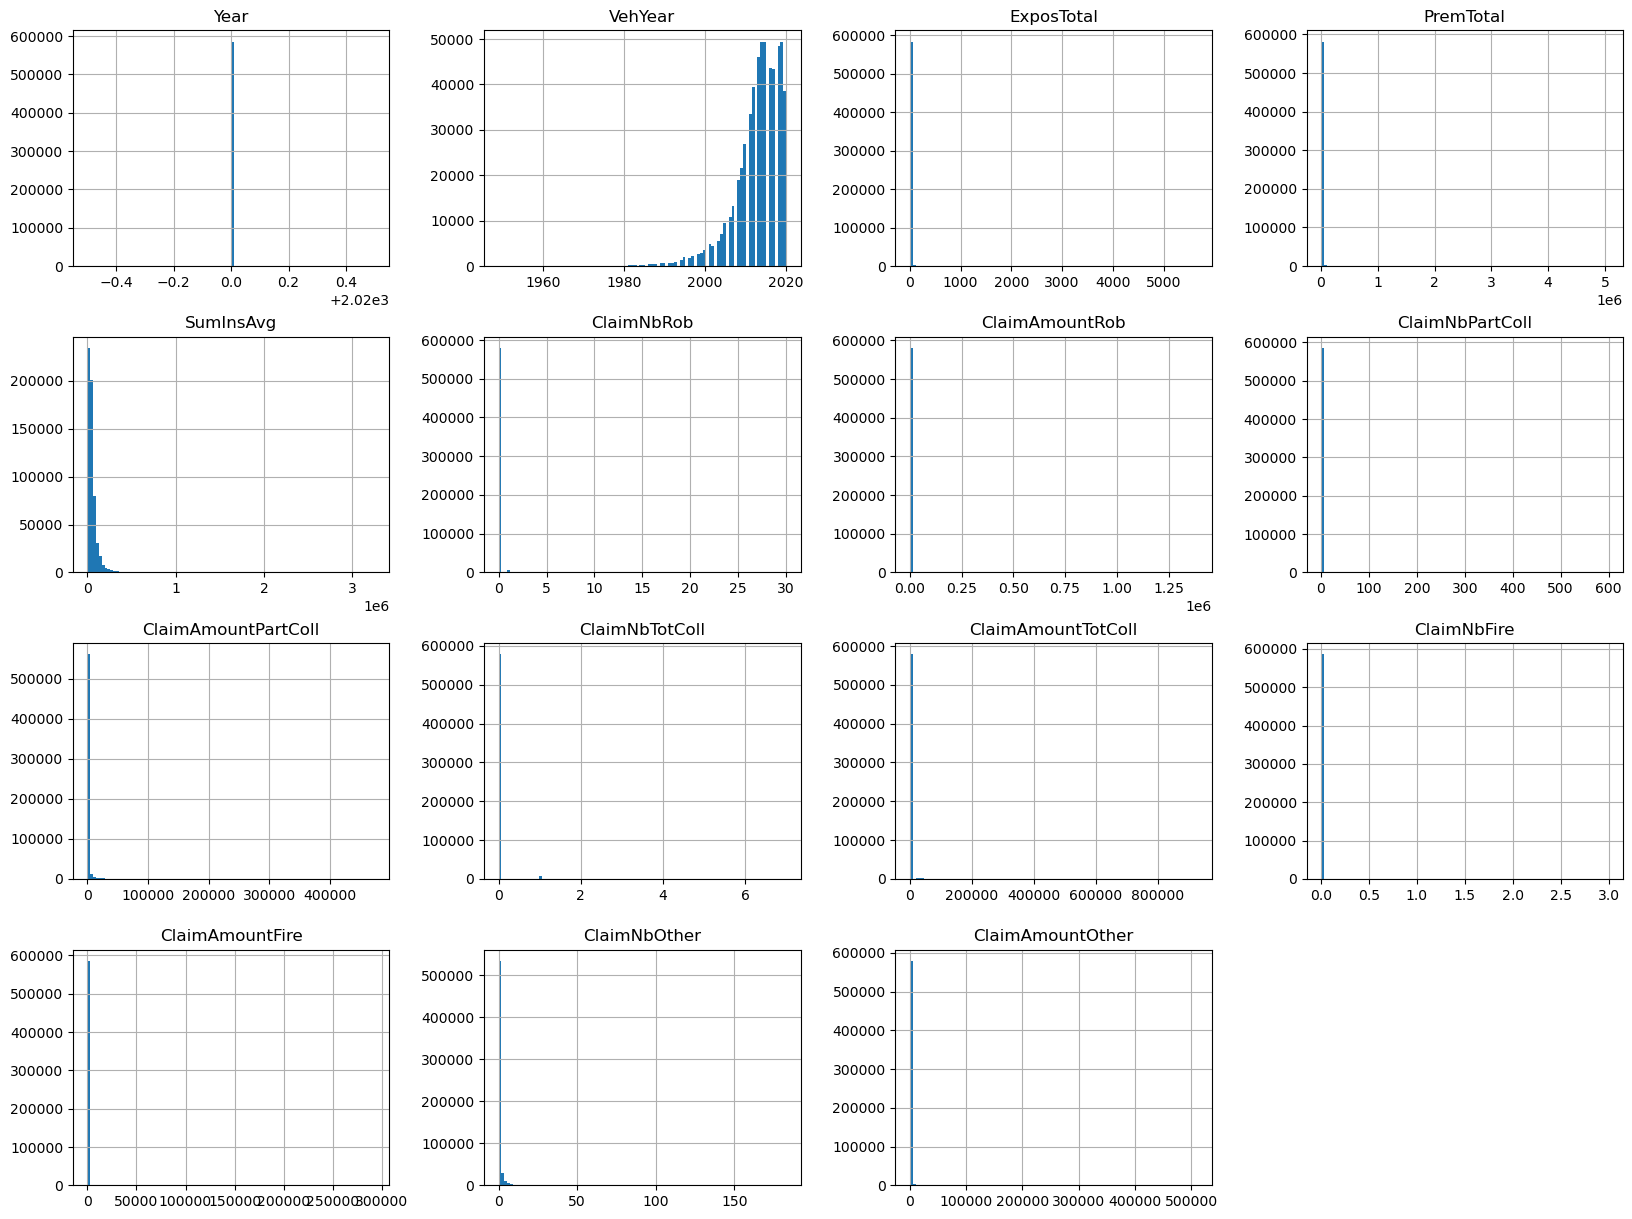

In [130]:
input_df.hist(figsize=(20, 15), bins=100)
plt.show()

In [131]:
q_ls =  list(list(np.arange(0.1, 1, 0.1)) + list(np.arange(0.91, 1, 0.01)) + list(np.arange(0.991, 1, 0.001)))
q_ls

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 0.91,
 0.92,
 0.93,
 0.9400000000000001,
 0.9500000000000001,
 0.9600000000000001,
 0.9700000000000001,
 0.9800000000000001,
 0.9900000000000001,
 0.991,
 0.992,
 0.993,
 0.994,
 0.995,
 0.996,
 0.997,
 0.998,
 0.999,
 1.0]

In [132]:
input_df.quantile(q_ls, numeric_only=True)

,Year,VehYear,ExposTotal,PremTotal,SumInsAvg,ClaimNbRob,ClaimAmountRob,ClaimNbPartColl,ClaimAmountPartColl,ClaimNbTotColl,ClaimAmountTotColl,ClaimNbFire,ClaimAmountFire,ClaimNbOther,ClaimAmountOther
0.100,2020.0,2006.0,0.139726,1.109718e+02,8.243926e+03,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000
0.200,2020.0,2009.0,0.378082,3.326995e+02,1.908126e+04,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000
0.300,2020.0,2011.0,0.498630,5.172371e+02,2.595521e+04,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000
0.400,2020.0,2013.0,0.498630,7.324632e+02,3.256207e+04,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000
0.500,2020.0,2014.0,0.536986,1.032670e+03,3.904156e+04,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000
0.600,2020.0,2015.0,0.997260,1.473259e+03,4.743513e+04,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000
0.700,2020.0,2017.0,1.389041,2.195835e+03,5.910556e+04,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000
0.800,2020.0,2018.0,2.252055,3.594082e+03,7.541004e+04,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000
0.900,2020.0,2019.0,4.808219,7.319666e+03,1.081936e+05,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,1.0,520.000
0.910,2020.0,2019.0,5.336986,8.081507e+03,1.142118e+05,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,1.0,587.000


In [133]:
cols_for_corr = [c for c in input_df.columns if c != "Year"]
corr_matrix = input_df[cols_for_corr].corr(method="spearman")
corr_matrix

C:\Users\s-117-15\AppData\Local\Temp\ipykernel_4992\635166028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = input_df[cols_for_corr].corr(method="spearman")


,VehYear,ExposTotal,PremTotal,SumInsAvg,ClaimNbRob,ClaimAmountRob,ClaimNbPartColl,ClaimAmountPartColl,ClaimNbTotColl,ClaimAmountTotColl,ClaimNbFire,ClaimAmountFire,ClaimNbOther,ClaimAmountOther
VehYear,1.000000,0.064448,0.229177,0.567064,0.010303,0.010464,0.097626,0.097879,-0.001227,-0.000835,-0.007701,-0.007699,-0.021142,-0.015591
ExposTotal,0.064448,1.000000,0.827717,0.062967,0.073980,0.073853,0.158049,0.156040,0.055884,0.055714,0.007805,0.007803,0.307242,0.294775
PremTotal,0.229177,0.827717,1.000000,0.420751,0.070380,0.070330,0.150830,0.149302,0.051419,0.051377,0.006471,0.006471,0.276697,0.265588
SumInsAvg,0.567064,0.062967,0.420751,1.000000,-0.040830,-0.040517,-0.038705,-0.037799,-0.046846,-0.046381,-0.012314,-0.012312,-0.101584,-0.102029
ClaimNbRob,0.010303,0.073980,0.070380,-0.040830,1.000000,0.999978,0.104763,0.103481,0.062667,0.062463,0.013132,0.013131,0.124333,0.123049
ClaimAmountRob,0.010464,0.073853,0.070330,-0.040517,0.999978,1.000000,0.104754,0.103477,0.062571,0.062370,0.013118,0.013117,0.124320,0.123043
ClaimNbPartColl,0.097626,0.158049,0.150830,-0.038705,0.104763,0.104754,1.000000,0.999084,0.121860,0.121856,0.017557,0.017557,0.289784,0.290640
ClaimAmountPartColl,0.097879,0.156040,0.149302,-0.037799,0.103481,0.103477,0.999084,1.000000,0.120911,0.120914,0.017278,0.017278,0.288935,0.289871
ClaimNbTotColl,-0.001227,0.055884,0.051419,-0.046846,0.062667,0.062571,0.121860,0.120911,1.000000,0.999968,0.022236,0.022234,0.147884,0.146718
ClaimAmountTotColl,-0.000835,0.055714,0.051377,-0.046381,0.062463,0.062370,0.121856,0.120914,0.999968,1.000000,0.022158,0.022156,0.147773,0.146619


In [134]:
corr_matrix["ClaimNbPartColl"].sort_values(ascending=False)

ClaimNbPartColl        1.000000
ClaimAmountPartColl    0.999084
ClaimAmountOther       0.290640
ClaimNbOther           0.289784
ExposTotal             0.158049
PremTotal              0.150830
ClaimNbTotColl         0.121860
ClaimAmountTotColl     0.121856
ClaimNbRob             0.104763
ClaimAmountRob         0.104754
VehYear                0.097626
ClaimNbFire            0.017557
ClaimAmountFire        0.017557
SumInsAvg             -0.038705
Name: ClaimNbPartColl, dtype: float64

<AxesSubplot: >

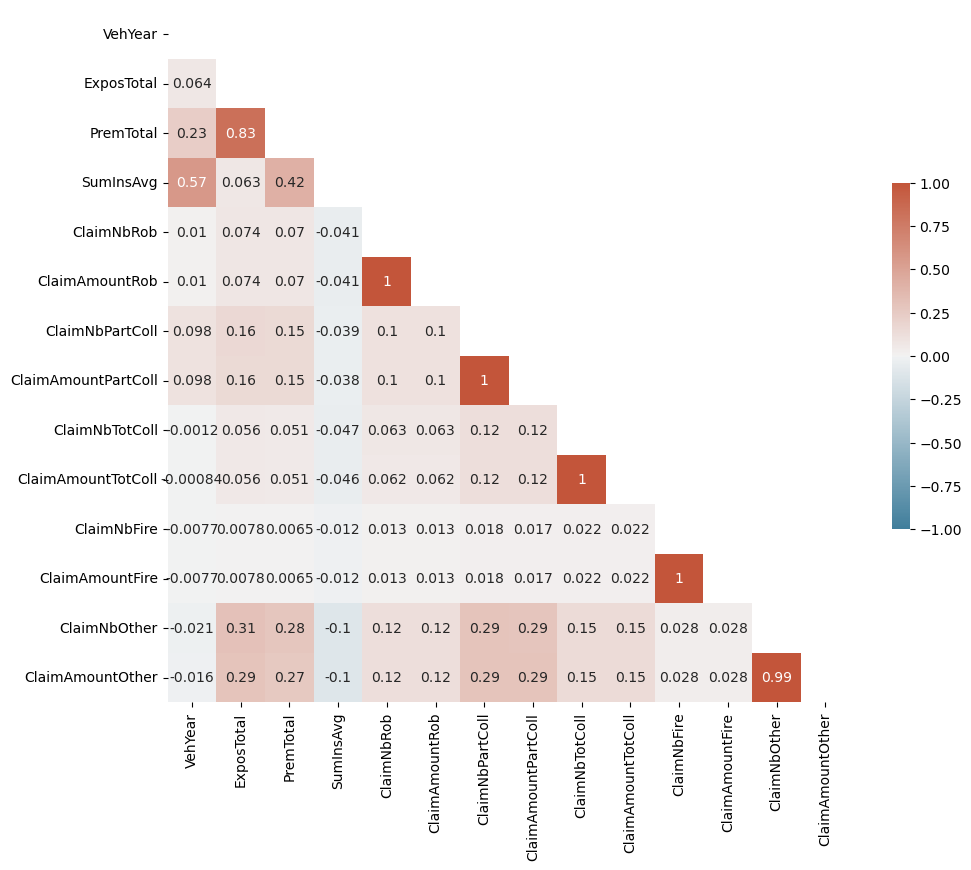

In [135]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)

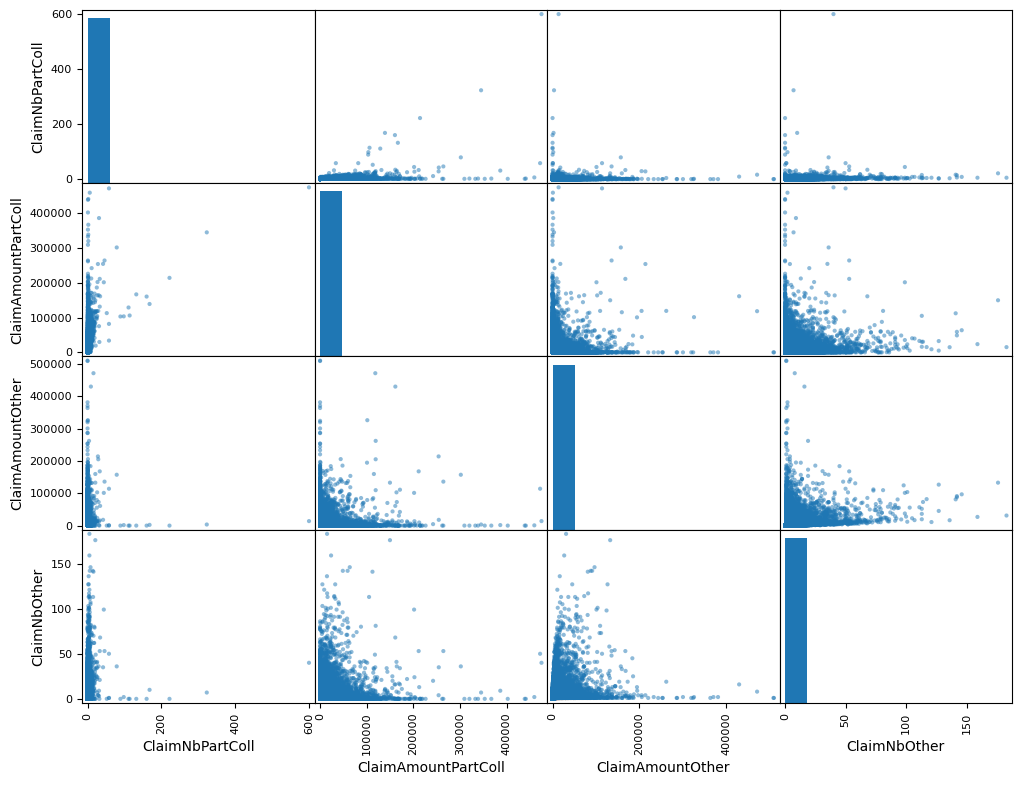

In [136]:
from pandas.plotting import scatter_matrix
cols_for_scatter = ['ClaimNbPartColl', 'ClaimAmountPartColl', 'ClaimAmountOther', 'ClaimNbOther']
ckaterb_materb = scatter_matrix
ckaterb_materb(input_df[cols_for_scatter], figsize=(12, 9))
plt.show()  

<AxesSubplot: xlabel='ClaimNbOther', ylabel='ClaimAmountOther'>

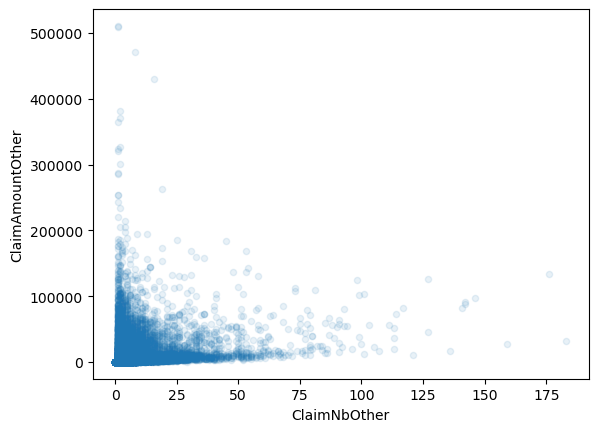

In [137]:
input_df.plot(kind="scatter", x="ClaimNbOther", y="ClaimAmountOther", alpha=0.1)

In [138]:
input_df_grouped = input_df.groupby("Gender").agg({"ClaimNbPartColl": "sum", "ClaimAmountPartColl": "sum"})

<AxesSubplot: xlabel='Gender'>

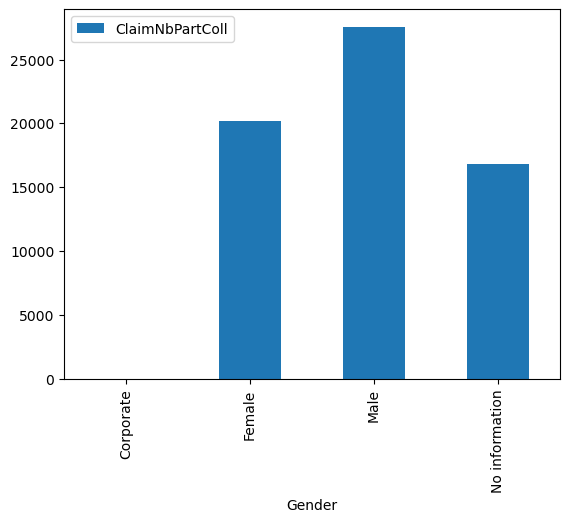

In [139]:
input_df_grouped.plot(kind="bar", y="ClaimNbPartColl")

In [140]:
input_df.describe(include=object)

,YearHalf,Area,StateName,StateAb,DrivAge,Gender,VehCat,VehGroup,VehModel,ENVIO
count,585965,578928,578928,578928,585965,585965,585965,574299,574299,585965
unique,1,40,27,27,6,4,8,462,6788,1
top,1st,Demais regioes,Sao Paulo,SP,36-45,Male,National Tour,HYUNDAI HB20,OUTROS,2020B
freq,585965,44157,133440,133440,123776,249104,298857,11226,3902,585965


In [141]:
for var in ["Area", "StateName", "DrivAge", "Gender", "VehCat"]:
    display(input_df[var].value_counts(dropna=False).to_frame().sort_index())

,Area
Acre,1784
Alagoas,7274
Amapa,1014
Amazonas,4855
Bahia,18405
Blumenau e demais regioes,20439
Brasilia,15847
Ceara,11682
Demais regioes,44157
Espirito Santo,14252


,StateName
Acre,1784
Alagoas,7274
Amapa,1014
Amazonas,4855
Bahia,18405
Ceara,11682
Distrito Federal,15847
Espirito Santo,14252
Goias,23188
Maranhao,6340


,DrivAge
18-25,36384
26-35,95450
36-45,123776
46-55,113136
55+,123454
No information,93765


,Gender
Corporate,111848
Female,188926
Male,249104
No information,36087


,VehCat
Bus (domestic and imported),1394
Cargo Vehicle (domestic and imported),31357
Imported Tour,51332
Motorcycle (domestic and imported),31294
National Tour,298857
Others,15761
Pick-up (domestic and imported),146485
Utilities (domestic and imported),9485


In [142]:
with pd.option_context('display.max_rows', None):
    print(input_df["VehGroup"].value_counts(dropna=False).to_frame().sort_index())

                                   VehGroup
ACURA                                     6
AGRALE - MARRUA                          26
AGRALE CAMINHOES - TODOS                302
ALFA ROMEO 145                            8
ALFA ROMEO 147                            3
ALFA ROMEO 155                            5
ALFA ROMEO 156                           18
ALFA ROMEO 164                            7
ALFA ROMEO 166                            1
ALFA ROMEO 2300                           1
ALFA ROMEO SPIDER                         5
AMAZONAS - AME                            5
ASIA MOTORS AM                            2
ASIA MOTORS TOPIC                        68
ASIA MOTORS TOWNER                        9
AUDI 80                                   4
AUDI A1                                  13
AUDI A3                                1993
AUDI A4                                 734
AUDI A5                                 421
AUDI A6                                 100
AUDI A7                         

In [143]:
input_df = input_df[input_df["Gender"] != "Corporate"]
input_df.shape

(474117, 25)

In [144]:
input_df.describe()

,Year,VehYear,ExposTotal,PremTotal,SumInsAvg,ClaimNbRob,ClaimAmountRob,ClaimNbPartColl,ClaimAmountPartColl,ClaimNbTotColl,ClaimAmountTotColl,ClaimNbFire,ClaimAmountFire,ClaimNbOther,ClaimAmountOther
count,474117.0,474117.000000,474117.000000,4.741170e+05,4.741170e+05,474117.000000,4.741170e+05,474117.000000,474117.000000,474117.000000,474117.000000,474117.000000,474117.000000,474117.000000,474117.000000
mean,2020.0,2013.180618,2.608107,3.623748e+03,5.070987e+04,0.016690,6.621465e+02,0.136205,919.431241,0.017907,801.368704,0.000664,23.773444,0.641116,525.043933
std,0.0,5.490947,8.542733,1.154237e+04,5.250389e+04,0.171033,8.554673e+03,1.305352,5825.031109,0.143256,8402.444643,0.028340,1456.454937,2.633284,4699.579175
min,2020.0,1950.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,2011.000000,0.484931,4.329319e+02,2.238853e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,2014.000000,0.632877,1.055630e+03,3.801200e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.0,2017.000000,1.939726,2.882603e+03,6.289500e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.0,2020.000000,677.386294,1.260947e+06,3.255798e+06,30.000000,1.389337e+06,600.000000,474044.000000,7.000000,927660.000000,3.000000,292907.000000,183.000000,510654.000000


In [145]:
keep_cols_df = ["Area", "StateAb", "DrivAge", "Gender", "VehCat", "VehGroup", "VehYear", "ExposTotal", "SumInsAvg", "ClaimNbPartColl"]
df = input_df[keep_cols_df]
df = df[df["ExposTotal"] > 0]

In [146]:
missing_df = df.isna().sum().to_frame(name="MissingCount")
missing_df["MissingCount (%)"] = 100 * missing_df["MissingCount"] / len(df)
missing_df['dtype'] = missing_df.index.to_series().apply(lambda x: df[x].dtype)
missing_df

,MissingCount,MissingCount (%),dtype
Area,6528,1.435880,object
StateAb,6528,1.435880,object
DrivAge,0,0.000000,object
Gender,0,0.000000,object
VehCat,0,0.000000,object
VehGroup,9755,2.145682,object
VehYear,0,0.000000,int64
ExposTotal,0,0.000000,float64
SumInsAvg,0,0.000000,float64
ClaimNbPartColl,0,0.000000,int64


In [147]:
df.dropna(how="any")

,Area,StateAb,DrivAge,Gender,VehCat,VehGroup,VehYear,ExposTotal,SumInsAvg,ClaimNbPartColl
0,Sul,MG,26-35,Male,National Tour,VW VOLKSWAGEN VOYAGE,2014,0.408219,37489.000824,0
1,Brasilia,DF,55+,Female,National Tour,FIAT BRAVO,2014,1.936986,26653.846655,0
2,Demais regioes,PR,46-55,Female,National Tour,VW VOLKSWAGEN FOX ACIMA DE 1.0,2018,8.975342,43953.900218,0
3,Ribeirao Preto e Demais Mun. de Campinas,SP,No information,Male,National Tour,VW VOLKSWAGEN - VIRTUS,2020,0.498630,63944.001640,0
4,Sergipe,SE,46-55,Female,Pick-up (domestic and imported),MITSUBISHI PAJERO,2013,0.460274,40899.429758,0
...,...,...,...,...,...,...,...,...,...,...
588367,Mato Grosso,MT,46-55,Male,National Tour,VW VOLKSWAGEN - UP,2017,0.076712,35730.000216,0
588368,Met. Curitiba,PR,55+,Male,National Tour,HONDA HR-V,2016,54.397260,75605.783630,4
588370,Rio Grande do Norte,RN,26-35,Female,National Tour,TOYOTA COROLLA,2018,0.501370,94616.640556,0
588371,Met. Curitiba,PR,36-45,Male,National Tour,GM CHEVROLET ASTRA,2010,18.484931,24724.996012,0


In [148]:
df["ClaimFreqPartColl"] = df["ClaimNbPartColl"] / df["ExposTotal"]

In [149]:
cat_cols = list(df.select_dtypes(include=object).columns)
cat_cols

['Area', 'StateAb', 'DrivAge', 'Gender', 'VehCat', 'VehGroup']

In [150]:
num_cols = list(df.select_dtypes(include=["int64", "float64"]).columns)
num_cols

['VehYear', 'ExposTotal', 'SumInsAvg', 'ClaimNbPartColl', 'ClaimFreqPartColl']

In [151]:
num_cols = [c for c in num_cols if not c.startswith("Claim") and not c in ['ExposTotal']]
num_cols

['VehYear', 'SumInsAvg']

In [152]:
mean_sia = df["SumInsAvg"].mean()
df.fillna(mean_sia)

,Area,StateAb,DrivAge,Gender,VehCat,VehGroup,VehYear,ExposTotal,SumInsAvg,ClaimNbPartColl,ClaimFreqPartColl
0,Sul,MG,26-35,Male,National Tour,VW VOLKSWAGEN VOYAGE,2014,0.408219,37489.000824,0,0.000000
1,Brasilia,DF,55+,Female,National Tour,FIAT BRAVO,2014,1.936986,26653.846655,0,0.000000
2,Demais regioes,PR,46-55,Female,National Tour,VW VOLKSWAGEN FOX ACIMA DE 1.0,2018,8.975342,43953.900218,0,0.000000
3,Ribeirao Preto e Demais Mun. de Campinas,SP,No information,Male,National Tour,VW VOLKSWAGEN - VIRTUS,2020,0.498630,63944.001640,0,0.000000
4,Sergipe,SE,46-55,Female,Pick-up (domestic and imported),MITSUBISHI PAJERO,2013,0.460274,40899.429758,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
588367,Mato Grosso,MT,46-55,Male,National Tour,VW VOLKSWAGEN - UP,2017,0.076712,35730.000216,0,0.000000
588368,Met. Curitiba,PR,55+,Male,National Tour,HONDA HR-V,2016,54.397260,75605.783630,4,0.073533
588370,Rio Grande do Norte,RN,26-35,Female,National Tour,TOYOTA COROLLA,2018,0.501370,94616.640556,0,0.000000
588371,Met. Curitiba,PR,36-45,Male,National Tour,GM CHEVROLET ASTRA,2010,18.484931,24724.996012,0,0.000000


In [153]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df[num_cols])
imputer.statistics_

array([ 2014.        , 39434.13110564])

In [154]:
from sklearn import set_config
set_config(transform_output="pandas")

In [155]:
df_num_trans = imputer.transform(df[num_cols])

In [156]:
df_num_trans

,VehYear,SumInsAvg
0,2014.0,37489.000824
1,2014.0,26653.846655
2,2018.0,43953.900218
3,2020.0,63944.001640
4,2013.0,40899.429758
...,...,...
588367,2017.0,35730.000216
588368,2016.0,75605.783630
588370,2018.0,94616.640556
588371,2010.0,24724.996012


In [157]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeAdderTransformer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x, y=None):
        x["VehAge"] = 2023 - x["VehYear"]
        x = x.drop("VehYear", axis=1)
        return x 

In [158]:
custom_trans = AttributeAdderTransformer()
custom_trans.transform(df)
df

,Area,StateAb,DrivAge,Gender,VehCat,VehGroup,VehYear,ExposTotal,SumInsAvg,ClaimNbPartColl,ClaimFreqPartColl,VehAge
0,Sul,MG,26-35,Male,National Tour,VW VOLKSWAGEN VOYAGE,2014,0.408219,37489.000824,0,0.000000,9
1,Brasilia,DF,55+,Female,National Tour,FIAT BRAVO,2014,1.936986,26653.846655,0,0.000000,9
2,Demais regioes,PR,46-55,Female,National Tour,VW VOLKSWAGEN FOX ACIMA DE 1.0,2018,8.975342,43953.900218,0,0.000000,5
3,Ribeirao Preto e Demais Mun. de Campinas,SP,No information,Male,National Tour,VW VOLKSWAGEN - VIRTUS,2020,0.498630,63944.001640,0,0.000000,3
4,Sergipe,SE,46-55,Female,Pick-up (domestic and imported),MITSUBISHI PAJERO,2013,0.460274,40899.429758,0,0.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...
588367,Mato Grosso,MT,46-55,Male,National Tour,VW VOLKSWAGEN - UP,2017,0.076712,35730.000216,0,0.000000,6
588368,Met. Curitiba,PR,55+,Male,National Tour,HONDA HR-V,2016,54.397260,75605.783630,4,0.073533,7
588370,Rio Grande do Norte,RN,26-35,Female,National Tour,TOYOTA COROLLA,2018,0.501370,94616.640556,0,0.000000,5
588371,Met. Curitiba,PR,36-45,Male,National Tour,GM CHEVROLET ASTRA,2010,18.484931,24724.996012,0,0.000000,13


In [159]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False, drop="first")
df_cat_1hot = cat_encoder.fit_transform(df[["Gender"]])
df_cat_1hot

,Gender_Male,Gender_No information
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
588367,1.0,0.0
588368,1.0,0.0
588370,0.0,0.0
588371,1.0,0.0


In [160]:
cat_encoder.categories_

[array(['Female', 'Male', 'No information'], dtype=object)]

In [161]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit_transform(df[num_cols])

,VehYear,SumInsAvg
0,0.152739,-0.293027
1,0.152739,-0.499276
2,0.881030,-0.169967
3,1.245175,0.210548
4,-0.029334,-0.228109
...,...,...
588367,0.698957,-0.326510
588368,0.516884,0.432531
588370,0.881030,0.794406
588371,-0.575552,-0.535992


In [162]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", AttributeAdderTransformer()),
    ("std_scaler", StandardScaler())
])
num_pipeline.fit_transform(df[num_cols])

,SumInsAvg,VehAge
0,-0.293027,-0.152739
1,-0.499276,-0.152739
2,-0.169967,-0.881030
3,0.210548,-1.245175
4,-0.228109,0.029334
...,...,...
588367,-0.326510,-0.698957
588368,0.432531,-0.516884
588370,0.794406,-0.881030
588371,-0.535992,0.575552


In [163]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", OneHotEncoder(sparse_output=False, drop="first"), cat_cols)
])

In [165]:
x = df.drop(["ExposTotal", "ClaimNbPartColl", "ClaimFreqPartColl"], axis=1)
y = df["ClaimFreqPartColl"]

In [167]:
x.head(1)

,Area,StateAb,DrivAge,Gender,VehCat,VehGroup,VehYear,SumInsAvg,VehAge
0,Sul,MG,26-35,Male,National Tour,VW VOLKSWAGEN VOYAGE,2014,37489.000824,9


In [168]:
y.head(1)

0    0.0
Name: ClaimFreqPartColl, dtype: float64

In [169]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [170]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(363707, 9)
(90927, 9)
(363707,)
(90927,)


In [171]:
x_train_prepared = full_pipeline.fit_transform(x_train)

In [172]:
pd.reset_option("display.max_columns")

In [173]:
x_train_prepared.head()

,num__SumInsAvg,num__VehAge,cat__Area_Alagoas,cat__Area_Amapa,cat__Area_Amazonas,cat__Area_Bahia,cat__Area_Blumenau e demais regioes,cat__Area_Brasilia,cat__Area_Ceara,cat__Area_Demais regioes,...,cat__VehGroup_VW VOLKSWAGEN SANTANA,cat__VehGroup_VW VOLKSWAGEN SAVEIRO,cat__VehGroup_VW VOLKSWAGEN SPACEFOX,cat__VehGroup_VW VOLKSWAGEN TIGUAN,cat__VehGroup_VW VOLKSWAGEN TOUAREG,cat__VehGroup_VW VOLKSWAGEN VOYAGE,cat__VehGroup_WUYANG,cat__VehGroup_YAMAHA MOTOS ACIMA DE 450CC,cat__VehGroup_YAMAHA MOTOS ATE 450CC,cat__VehGroup_nan
583071,3.166660,-0.880950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344085,-0.410228,0.212120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539692,-0.259268,-0.334415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504620,-0.406336,0.029941,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
315606,-0.192881,-0.698772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X=x_train_prepared, y=y_train)


LinearRegression()

In [179]:
print(lin_reg.coef_)

[-5.42333047e-02 -9.72602473e-02  1.64371557e+11  3.28775463e+10
 -8.12101250e+09 -5.68671628e+11  6.46625526e+11 -1.87395118e+11
  5.35868964e+10  6.81041655e+10  1.17709474e+10  6.81041655e+10
  2.58637459e+11 -8.24259381e+10 -5.69993933e+10 -8.24259381e+10
  1.84384694e+11  2.33133548e+11  1.66788573e+11  6.81041655e+10
  6.46625526e+11  6.81041655e+10 -8.24259381e+10 -5.69993933e+10
 -2.06772338e+11  6.46625526e+11  1.64101003e+11  2.53308282e+10
  7.90909636e+11  8.96442205e+11 -8.24259381e+10 -9.09113765e+11
 -4.70607327e+10 -2.37403870e+11  1.34638607e+10  2.58637459e+11
 -2.06772338e+11 -3.36886476e+11 -2.06772338e+11 -2.06772338e+11
 -8.24259381e+10 -1.24950362e+11 -1.64371557e+11  8.12101250e+09
 -3.28775463e+10  5.68671628e+11 -5.35868964e+10  1.87395118e+11
 -1.17709474e+10 -2.58637459e+11 -1.84384694e+11  2.06772338e+11
 -1.66788573e+11 -2.33133548e+11 -1.64101003e+11 -2.53308282e+10
 -7.90909636e+11 -8.96442205e+11 -6.81041655e+10  5.69993933e+10
  9.09113765e+11  4.70607

In [177]:
print(lin_reg.intercept_)

-0.7461319947064844


In [178]:
x_pred_lin_reg = lin_reg.predict(x_train_prepared)
x_pred_lin_reg

array([ 0.00432577, -0.02325926, -0.01187525, ...,  0.11970129,
        0.05648412,  1.15767469])

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
lin_mse = mean_squared_error(y_train, x_pred_lin_reg)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.914725231655613

In [186]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_prepared, y_train)

DecisionTreeRegressor()

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
x_pred_dec_tree = tree_reg.predict(x_train_prepared)
lin_mse = mean_squared_error(y_train, x_pred_dec_tree)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.059314755440782366

In [188]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=tree_reg, X=x_train_prepared, y=y_train, scoring="neg_mean_squared_error", cv=3)
tree_rmse_scores = np.sqrt(-scores)

In [191]:
def display_scores(scores):
    print(f"Scores: {scores}\nAvg Scores: {scores.mean()}\nStd scores: {scores.std()}")

In [193]:
display_scores(tree_rmse_scores)

Scores: [9.96794598 8.52614775 9.06138634]
Avg Scores: 9.185160022709624
Std scores: 0.5950828971774438


In [196]:
lin_scores = cross_val_score(estimator=lin_reg, X=x_train_prepared, y=y_train, scoring="neg_mean_squared_error", cv=3)
lin_reg_scores = np.sqrt(-lin_scores)

In [197]:
display_scores(lin_reg_scores)

Scores: [1.76786824e+09 5.59153458e+07 7.94371511e+08]
Avg Scores: 872718366.0616499
Std scores: 701094074.1098758


In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10], "max_depth": [2, 3]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=2, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X=x_train_prepared, y=y_train)


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 3], 'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [200]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 10}

In [201]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=2, n_estimators=10)

In [202]:
grid_search.cv_results_

{'mean_fit_time': array([ 3.28490007,  8.34780908,  4.24802899, 11.97290134]),
 'std_fit_time': array([0.09365022, 0.04240346, 0.01659894, 0.0249579 ]),
 'mean_score_time': array([0.28552258, 0.30952466, 0.28852224, 0.31652772]),
 'std_score_time': array([0.00050008, 0.00350058, 0.00049996, 0.0044986 ]),
 'param_max_depth': masked_array(data=[2, 2, 3, 3],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[3, 10, 3, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 'n_estimators': 3},
  {'max_depth': 2, 'n_estimators': 10},
  {'max_depth': 3, 'n_estimators': 3},
  {'max_depth': 3, 'n_estimators': 10}],
 'split0_test_score': array([-39.72655749, -39.52892962, -40.33638979, -40.19337608]),
 'split1_test_score': array([-30.90698845, -30.8527979 , -32.64434564, -32.45854593]),
 'mean_test_score': array([-35.31677297,

In [204]:
for mean_score, params in zip(grid_search.cv_results_["mean_test_score"], grid_search.cv_results_["params"]):
    print(np.sqrt(-mean_score), params)

5.942791681528853 {'max_depth': 2, 'n_estimators': 3}
5.932188783569428 {'max_depth': 2, 'n_estimators': 10}
6.040725760529924 {'max_depth': 3, 'n_estimators': 3}
6.027102206030521 {'max_depth': 3, 'n_estimators': 10}


In [205]:
final_model = grid_search.best_estimator_
X_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)
final_mse = mean_square_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)



ValueError: Found unknown categories ['KIA MOTORS QUORIS  ', 'JEEP COMMANDER', 'IVECO DAILY MAX VAN', 'GREAT WALL', 'AUDI RS6'] in column 5 during transform

OFFTOP

<AxesSubplot: xlabel='a', ylabel='b'>

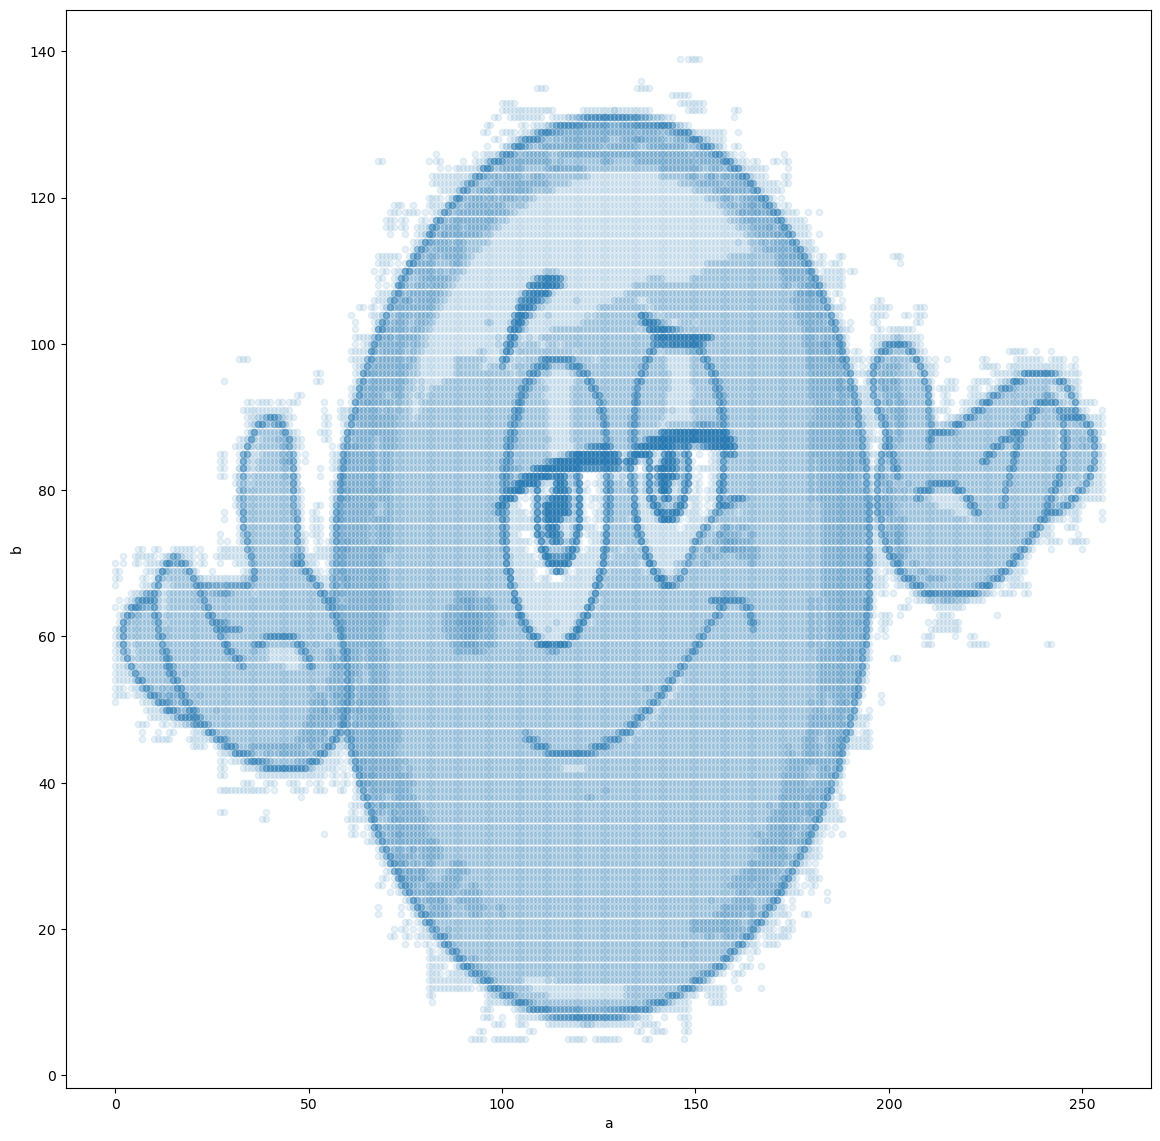

In [198]:
png_df = pd.read_csv("output.csv")
png_df.plot(kind="scatter", x="a", y="b", alpha = 0.10, figsize=(14, 14))